<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/linear-regression/linear_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression: Exercise

For this exercise you will need to create your first linear regression model. To do this you will use the Boston Housing Dataset, which you have already seen in the section on data preprocessing. You can download the already cleaned dataset from here.

The dataset contains the following information:


CRIM Crime rate per capita

ZN Percentage of residential land zoned for lots greater than 25,000 sq.ft.

INDUS Percentage of non-retail business acres by city.

CHAS Dummy variable indicating proximity to the Charles River.

NOX Concentration of nitrogen oxide (parts per 10 million).

RM Average number of rooms per dwelling

AGE Percentage of occupied dwellings built after 1940

DIS Weighted average of distances to 5 Boston employment centers.

RAD Index of accessibility to highways

TAX Full value property tax rate in $10,000.

PRATIO Student-teacher ratio by city.

BLACK 1000(Bk - 0.63)^2 where Bk is the percentage of black residents per city

LSTAT Percentage of poor population

PRICE Median value of occupied housing in $1,000.

The target is the PRICE column, that is, we want to predict the value of housing.


Specifically, you need to solve the following points:

1. Create the correlation matrix.

2. Train and evaluate a simple linear regression model use the variable that seems most correlated with the target.

3. Train and evaluate a multiple linear regression model using the two variables that seem most related to the target.

4. Add a third variable, then create several polynomial regression models, without exceeding degree 5, try both with and without bias.

5. Train and evaluate a linear regression model using all variables in the dataset.

6. Run normalization of the data and retrain the model, did performance improve?

7. Perform data standardization and retrain the model, has performance improved?

8. Use the model with all the features to predict housing prices found in this CSV file.

9. Save the result in an excel file named “housing_estimate.xlsx”, it should contain two columns: OWNER=the homeowner, ESTIMATED PRICE=the value estimated by our model.


Note If you already chew on the subject and the term “overfitting” is not new to you, don't worry about it for now, we will get to it in the next section.

Translated with DeepL.com (free version)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/refs/heads/main/datasets/boston.csv', index_col=0)

## 1 - Create the correlation matrix.

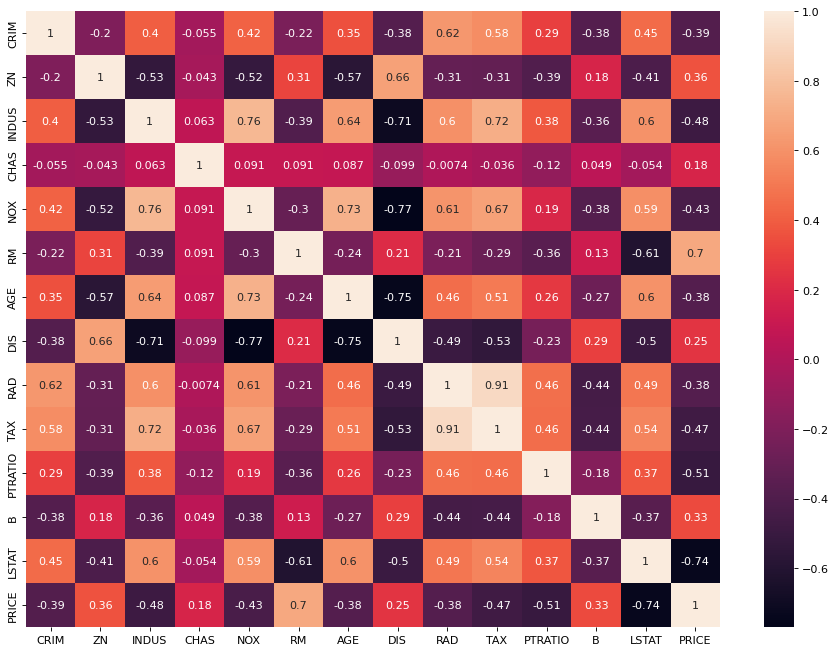

In [ ]:
data = df.corr().values

plt.figure(figsize=(14, 10), dpi=80)

sns.heatmap(data,
            xticklabels=df.columns,
            yticklabels=df.columns,
            annot_kws={'size': 10},
            annot=True)

plt.show()

## 2 - Train and evaluate a simple linear regression model using the variable that appears most correlated with the target.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
def evaluate(model, dataset):
  x, y = dataset
  y_pred = model.predict(x)
  print(f"MSE: {mean_squared_error(y, y_pred):.2f}")
  print(f"R2: {r2_score(y, y_pred):.2f}")

In [ ]:
x = df[['LSTAT']].values
y = df[['PRICE']].values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [ ]:
evaluate(lr, (x, y))

MSE: 38.48
R2: 0.54


In [ ]:
y.min()

np.float64(5.0)

In [ ]:
y.max()

np.float64(50.0)

In [ ]:
y.mean()

np.float64(22.532806324110677)

## 3 - Train and evaluate a multiple linear regression model using the two variables that appear to be most correlated with the target.

In [ ]:
x = df[['LSTAT','RM']].values
y = df[['PRICE']].values

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x, y)

LinearRegression()

In [ ]:
evaluate(lr, (x, y))

RMSE: 30.51
R2: 0.64


## 4 - Add a third variable, then create several polynomial regression models, without exceeding degree 5.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x = df[['LSTAT','RM','PTRATIO']].values
y = df[['PRICE']].values

In [ ]:
for i in range(1, 6):
  poly = PolynomialFeatures(degree=i, include_bias=True)
  x_poly = poly.fit_transform(x)
  lr = LinearRegression()
  lr.fit(x_poly, y)
  evaluate(lr, (x_poly, y))

MSE: 27.13
R2: 0.68
MSE: 17.17
R2: 0.80
MSE: 15.95
R2: 0.81
MSE: 13.92
R2: 0.84
MSE: 12.22
R2: 0.86


In [ ]:
for i in range(1, 6):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  x_poly = poly.fit_transform(x)
  lr = LinearRegression()
  lr.fit(x_poly, y)
  evaluate(lr, (x_poly, y))

MSE: 27.13
R2: 0.68
MSE: 17.17
R2: 0.80
MSE: 15.95
R2: 0.81
MSE: 13.92
R2: 0.84
MSE: 12.22
R2: 0.86


## 5 - Train and evaluate a linear regression model using all variables in the dataset.

In [ ]:
cols = df.columns
cols = cols.drop('PRICE')
x = df[cols].values
y = df[['PRICE']].values

In [ ]:
lr = LinearRegression()
lr.fit(x, y)
evaluate(lr, (x, y))

MSE: 21.90
R2: 0.74


## 6 - Perform data normalization and retrain the model, did the performance improve?

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
mms = MinMaxScaler()
x_norm = mms.fit_transform(x)

In [ ]:
lr = LinearRegression()
lr.fit(x_norm, y)
evaluate(lr, (x_norm, y))

MSE: 21.90
R2: 0.74


It has no effect because when we use scikit-learn's LinearRegression (least squares) the normalization has no effect

## 7 - Perform data standardization and retrain the model, did the performance improve?

In [ ]:
ss = StandardScaler()
x_norm = ss.fit_transform(x)

In [ ]:
lr = LinearRegression()
lr.fit(x_norm, y)
evaluate(lr, (x_norm, y))

MSE: 21.90
R2: 0.74


It has no effect because when we use scikit-learn's LinearRegression (least squares) the standardization has no effect

## 8 - Use the full featured model to predict the price of houses that you find in this CSV file.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing_predict.csv')

In [ ]:
cols = df.columns
cols = cols.drop('OWNER')
x = df[cols].values

In [ ]:
ss = StandardScaler()

In [ ]:
x_std = ss.fit_transform(x)

In [ ]:
lr.predict(x_std)

array([[16.46722664],
       [26.09148438],
       [12.09852291],
       [27.45806659],
       [30.5487311 ]])

In [ ]:
y_pred = lr.predict(x_std)

In [ ]:
y_pred

array([[16.46722664],
       [26.09148438],
       [12.09852291],
       [27.45806659],
       [30.5487311 ]])

In [ ]:
y_pred.reshape(-1)

array([16.46722664, 26.09148438, 12.09852291, 27.45806659, 30.5487311 ])

## 9 - Save the result in an excel file called "housing_estimate.xlsx", it must contain two columns: OWNER=the owner of the house, ESTIMATED PRICE=the value estimated by our model.

In [ ]:
df_final = pd.DataFrame({"OWNER": df["OWNER"].values, "ESTIMATED_PRICE": y_pred.reshape(-1)})

In [ ]:
df_final.to_excel("housing_estimate.xlsx")